# Loading Data

Import and drive mount

In [1]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
# from google.colab import drive

# drive.mount('/content/drive/')



Variable and label definition

In [2]:
image_size = 100
dataset_directory = './'  # change to your own directory

age_ranges = {
    (6,20) : 0, 
    (35,40) : 1, 
    (55,98) : 2
}

def convert_ranges(age):
  for key in age_ranges:
    if key[0] <= age <= key[1]:
      return age_ranges[key]


def transform_labels_age(labels_vec):
  new_labels_vec = []
  for x in labels_vec:
    x2 = x.split('-')
    new_labels_vec.append(convert_ranges(int(x2[1])))
  return np.array(new_labels_vec)

def transform_labels(labels_vec):
  return transform_labels_age(labels_vec)


Data loading and rescaling

In [3]:
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train_full = np.load(join(dataset_directory, 'train_labels.npy'))
labels_train = transform_labels(labels_train_full)

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val_full = np.load(join(dataset_directory, 'val_labels.npy'))
labels_val = transform_labels(labels_val_full)

images_test_public = np.load(join(dataset_directory, 'test_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)

print(labels_val_full[:9])
print(labels_val[:9])


(13475, 100, 100, 3)
(2595, 100, 100, 3)
(2374, 100, 100, 3)
['12626-16' '12726-37' '12726-37' '12726-37' '12726-37' '12726-37'
 '12726-37' '12726-39' '12726-37']
[0 1 1 1 1 1 1 1 1]


In [8]:
np.unique(labels_train)

array([0, 1, 2])

Visualising sample images

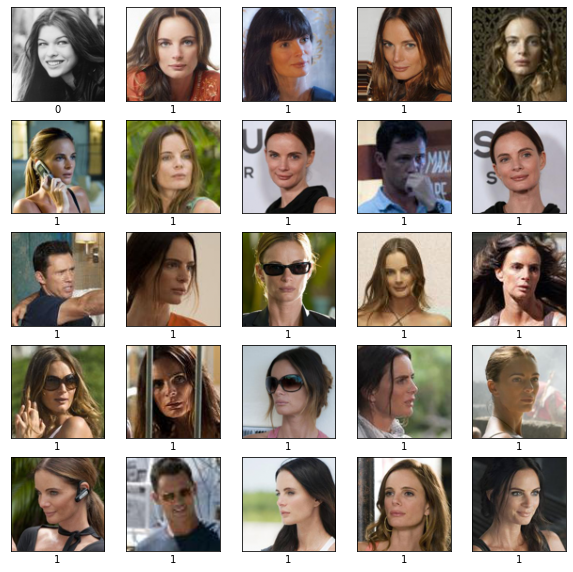

In [4]:
plt.figure(figsize=(10,10))
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_val[i+offset], cmap=plt.cm.binary)
    plt.xlabel(labels_val[i+offset])
plt.show()